In [23]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [24]:
SAMPLES_NUMBERS = 100

In [43]:
samples = np.array([
    *[[random.randint(171,200), random.randint(65,100),1] for _ in range(SAMPLES_NUMBERS) ],
    *[[random.randint(140,170), random.randint(40,65),2] for _ in range(SAMPLES_NUMBERS) ],
    *[[random.randint(170,200), random.randint(40,65),3] for _ in range(int(SAMPLES_NUMBERS/2))],
    *[[random.randint(140,170), random.randint(65,100),3] for _ in range(int(SAMPLES_NUMBERS/2)) ]
], dtype=float)

In [44]:
def normalize(feature):
    min = np.min(feature)
    max = np.max(feature)
    return (feature - min) / (max-min)

samples[:,0] = normalize(samples[:,0])
samples[:,1] = normalize(samples[:,1])

In [45]:
df = pd.DataFrame(samples, columns=['height', 'weight', 'class'])

In [ ]:
df.head()

In [51]:
df.describe()

,height,weight,class
count,300.000000,300.000000,300.000000
mean,0.495333,0.471389,2.000000
std,0.284507,0.287209,0.817861
min,0.000000,0.000000,1.000000
25%,0.250000,0.233333,1.000000
50%,0.500000,0.416667,2.000000
75%,0.733333,0.733333,3.000000
max,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='height', ylabel='weight'>

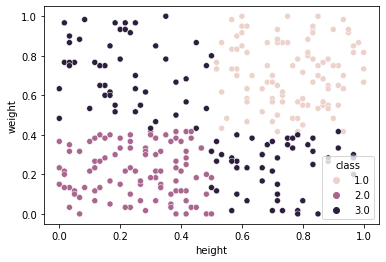

In [48]:
sns.scatterplot(x="height", y="weight", data=df, hue="class")

In [431]:
x = np.hstack((samples[:,:2], np.ones((samples.shape[0],1), dtype=float))).T
y = np.zeros((int(samples[:,2].max()), samples.shape[0]))
y[samples[:,2].astype(int)-1, np.arange(samples.shape[0])]=1

In [430]:
samples.shape[0]-1

299

In [428]:
x[:, :10]

array([[0.83333333, 0.93333333, 1.        ],
       [0.9       , 0.48333333, 1.        ],
       [0.7       , 0.7       , 1.        ],
       [0.53333333, 0.43333333, 1.        ],
       [0.76666667, 0.48333333, 1.        ],
       [0.95      , 0.91666667, 1.        ],
       [0.58333333, 0.7       , 1.        ],
       [0.86666667, 0.55      , 1.        ],
       [0.6       , 0.91666667, 1.        ],
       [0.7       , 0.58333333, 1.        ]])

In [434]:
y[:,:10]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [478]:
w = np.random.uniform(-0.3, 0.3, (x.shape[0], y.shape[0]))

In [479]:
w

array([[ 0.16975968,  0.23006349,  0.21670003],
       [ 0.16751022, -0.29266254, -0.27924827],
       [ 0.07811137, -0.22812488,  0.18368448]])

In [480]:
max_iterations = 500
learning_rate = 0.1
errors = []
min_error = 0.01

for i in range(max_iterations):
    y_predict = w.dot(x)
    error = y -y_predict
    mean_error = error.mean()
    errors.append(mean_error)
    w += error.dot(x.T)/x.shape[1] * learning_rate
    if(i%10==0):
        print(mean_error)
    if mean_error<min_error:
        break

0.2700518679809956
0.05889195577803757
0.01701910111819965


<AxesSubplot:>

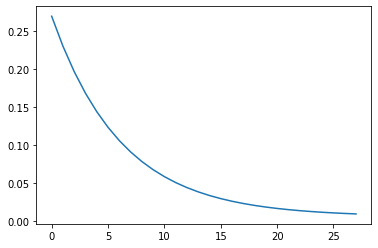

In [481]:
sns.lineplot(x=range(len(errors)), y=errors)

In [482]:
errors[-1]

0.009820622407884715